# Graphs

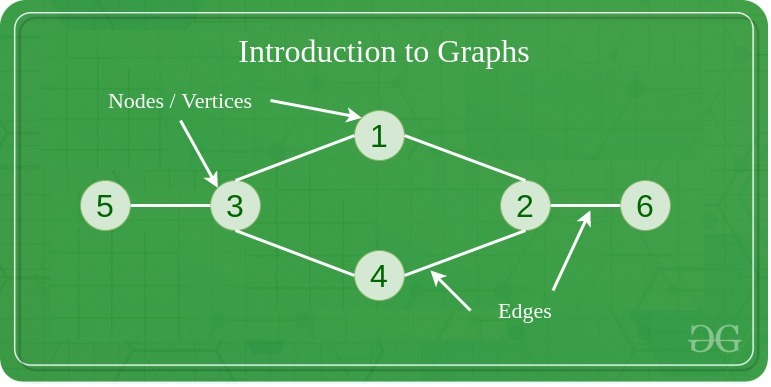

##### Graph is composed of a set of vertices( V ) and a set of edges( E ). The graph is denoted by G(E, V)

#### Components of a Graph

* Nodes / Vertices:
> Vertices are the fundamental units of the graph. Sometimes, vertices are also known as vertex or nodes. Every node/vertex can be labeled or unlabelled. Eg.- Users in Instagram
* Edges:
> Edges are drawn or used to connect two nodes of the graph. It can be ordered pair of nodes in a directed graph. Edges can connect any two nodes in any possible way. There are no rules. Sometimes, edges are also known as arcs. Every edge can be labeled/unlabelled. Eg.- Followers and Following in Instagram

* Un-Directed / Bi-Directional: Two-way edges
* Directed: One-way edges

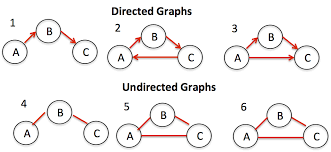

Edges can be Weighted and Un-Weighted. Visualize it in form of distance or cost of traveling from Vetrex A --> Vertex B

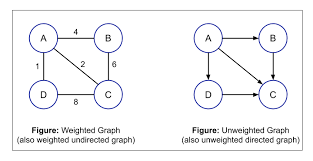

Storing Graph Sructure | Representation:
* Adjacency Matrix
* Adjacency List | List of Lists

* e(A) | The eccentricity of any Vertex: Maximum distance from a vertex to all other vertices is considered as the Eccentricity of that vertex.
* d(A, B) | Shortest distance between vertex A and vertex B.
* r(G) | Radius of a Connected Graph: The minimum value of eccentricity from all vertices is basically considered as the radius of connected graph.
* d(G) | Diameter of A Connected Graph: Unlike the radius of the connected graph here we basically used the maximum value of eccentricity from all vertices to determine the diameter of the graph.
* if e(V)=r(G) then v is the central point | Central Point and Centre: The vertex having minimum eccentricity is considered as the central point of the graph. And the sets of all central point is considered as the centre of Graph.(V is any vertex)

### Graphs Representation

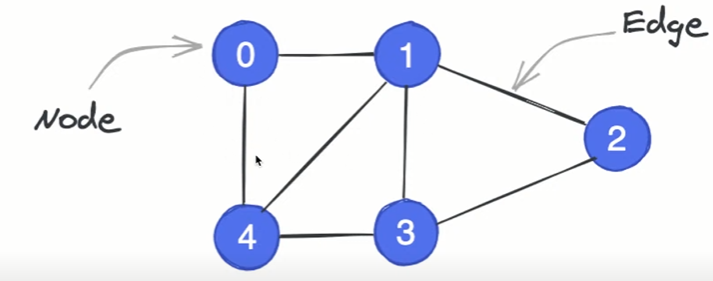

In [29]:
numNodes = 5
edges = [(0,1), (0,4), (1,2), (1,3), (1,4), (2,3), (3,4)]
numNodes, len(edges)

(5, 7)

To work with graph more efficiently use Adjacency List

In [30]:
numNodes = 5
adjLst = [] ### this will contain the list of all the nodes connected to a paricular vertex
# adjLst[0] = [1,4]
# adjLst[1] = [0,2,3,4]
# adjLst[2] = [1,3]
# adjLst[3] = [1,2,4]
# adjLst[4] = [0,1,3]

In [31]:
l1 = [[]]*5
l1

[[], [], [], [], []]

In [32]:
l1[0].append(1)

In [33]:
l1

[[1], [1], [1], [1], [1]]

In [34]:
l2 = [[] for _ in range(5)]
l2

[[], [], [], [], []]

In [35]:
l2[0].append(1)
l2

[[1], [], [], [], []]

In [36]:
for src, dest in edges:
    print(src, dest)

0 1
0 4
1 2
1 3
1 4
2 3
3 4


In [52]:
## Question: Create a class to represnt a graph as an adjacency list in Python

class Graph:
    def __init__(self, numNodes, edges):
        self.numNodes = numNodes
        self.data = [[] for _ in range(numNodes)]
        for src, dest in edges:
            self.data[src].append(dest)
            self.data[dest].append(src)
    
    def __repr__(self):
        return "\n".join(["{}: {}".format(n, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self):
        return self.__repr__()

In [53]:
numNodes

5

In [54]:
edges

[(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]

In [55]:
graph1 = Graph(numNodes, edges)

In [57]:
graph1

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

In [ ]:
### Question: Write a function to add an edge to a graph represented as an adjacency list.

 

In [ ]:
### Question: Write a function to remove an edge from a graph represented as a adjacency list.



Graph Representation using Adjacency Matrix

### Graph Traversal

#### BFS (Breadth-First Search)


* Always discovers the shortest path
* Finds all the nodes that is 1 edge away then 2 edge away, then 3 edge away..etc.From the source node.
* Data Structure called Queue (FIFO / enqueue-dequeue), is used to store all the nodes to be visited without mixing the order

In [58]:
### Question: Implement BFS given a source node in graph using Python



### LC Questions

1971. Find if the Path Exists in Graph

In [64]:
n = 3
edges = [[0,1],[1,2],[2,0]]
source = 0
destination = 2

BFS

In [65]:
def validPath(n, edges, source, destination):
    ### a way to store all the edges in 'graph'
    graph = [[] for _ in range(n)]
    for a,b in edges:
        graph[a].append(b)
        graph[b].append(a)

    ### Store all the nodes to be visited in 'queue'
    seen = [False]*n
    seen[source] = True
    queue = [source] ### collections.deque([source])

    while queue:
        curr_node = queue.pop(0) ##  queue.popleft()  more optimized code
        if curr_node == destination:
            return True

        for next_node in graph[curr_node]:
            if not seen[next_node]:
                seen[next_node] = True
                queue.append(next_node)

    return False

In [66]:
validPath(n, edges, source, destination)

True

DFS: Recursive

In [67]:
def validPath(n, edges, source, destination):
    graph = [[] for _ in range(n)]
    for a, b in edges:
        graph[a].append(b)
        graph[b].append(a)
        
    seen = [False] * n
    
    def dfs(curr_node):
        if curr_node == destination:
            return True
        if not seen[curr_node]:
            seen[curr_node] = True
            for next_node in graph[curr_node]:
                if dfs(next_node):
                    return True
        return False
        
    return dfs(source)

In [68]:
validPath(n, edges, source, destination)

True

DFS: Iterative

In [69]:
def validPath(n, edges, source, destination):
    # Store all edges according to nodes in 'graph'.
    graph = [[] for _ in range(n)]
    for a, b in edges:
        graph[a].append(b)
        graph[b].append(a)
    
    # Start from source node, add it to stack.
    seen = [False] * n
    seen[source] = True
    stack = [source]
    
    while stack:
        curr_node = stack.pop()
        # Add all unvisited neighbors of the current node to stack 
        # and mark them as visited.
        for next_node in graph[curr_node]:
            if next_node == destination:
                return True
            if not seen[next_node]:
                seen[next_node] = True
                stack.append(next_node)
    
    return seen[destination]

In [70]:
validPath(n, edges, source, destination)

True

DSU: Disjoint Set Union

In [71]:
class UnionFind:
    def __init__(self, n):
        self.root = list(range(n))
        self.rank = [1] * n
    def find(self, x):
        if self.root[x] != x:
            self.root[x] = self.find(self.root[x])
        return self.root[x]
    def union(self, x, y):
        root_x, root_y = self.find(x), self.find(y)
        if root_x != root_y:
            if self.rank[root_x] > self.rank[root_y]:
                root_x, root_y = root_y, root_x
            # Modify the root of the smaller group as the root of the
            # larger group, also increment the size of the larger group.
            self.rank[root_y] += self.rank[root_x]
            self.root[root_x] = root_y

class Solution:
    def validPath(n, edges, source, destination):
        uf = UnionFind(n)

        for a, b in edges:
            uf.union(a, b)

        return uf.find(source) == uf.find(destination)

In [72]:
Solution.validPath(n, edges, source, destination)

True